In [1]:
# This notebook enable you to explore json dump downloaded from WW API in interacive mode. Transformations that
# already implemented, represented in this notebook. New data transformations can be tested and later implemented
# Just put your ereceipts.json file next to the notebook, read it (check filepath below) and run the notebook.

In [2]:
import pandas as pd
import json
import plotly.express as px

In [3]:
class WWData:
    """ It's a dummy class - replacement for the class of the same name in
    the production code, with it this notebook code snippets can be copy-pasted from and to dashboads code
    if you use the same object names. """

    # Constants
    DIVISIONS = {'SO1010': 'BWS',
                 'SO1005': 'Supermarkets',
                 'SO1030': 'WW Metro'}

    def __init__(self, session_id='', filepath='', debug=False):
        self.transactions = pd.DataFrame()
        self.items = pd.DataFrame()
        
ww = WWData()

In [4]:
filepath = './ereceipts.json' # change path and name if neccessary

In [5]:
with open(filepath) as json_file:
    json_data = json.load(json_file)

In [6]:
pd_tbl = pd.json_normalize(json_data)
pd_tbl.set_index('basketKey', inplace=True)
pd_tbl.head()

,card,banner,storeName,storeNo,receiptKind,pointsEarned,receiptDate,total,gst,date,...,qffNumber,qffPointsEarned,transactionStatusCode,lmsReversalStatus,lmsErrSgmtUpdStatus,emailSendStatus,errorType,errorSource,errorCode,errorDescr
basketKey,,,,,,,,,,,,,,,,,,,,,
20210825154930003074446649,9355036811085,SO1010,Marrickville Metro BWS,6649,"[MainReceipt, Coupon]",40,2021-08-25T15:49:54+10:00,$40.00,$3.64,25/08/2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210825154136083078961649,9355036811085,SO1005,Marrickville Metro,1649,"[MainReceipt, Coupon]",50,2021-08-25T15:43:45+10:00,$49.72,$0.69,25/08/2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210821162427062077961149,9355036811085,SO1005,Marrickville,1149,"[MainReceipt, Coupon]",20,2021-08-21T16:25:09+10:00,$20.94,$1.09,21/08/2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210817123756068068201649,9355036811085,SO1005,Marrickville Metro,1649,"[MainReceipt, Coupon]",94,2021-08-17T12:41:30+10:00,$93.34,$1.08,17/08/2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210812133907066045471649,9355036811085,SO1005,Marrickville Metro,1649,"[MainReceipt, Coupon]",116,2021-08-12T13:42:23+10:00,$91.10,$2.91,12/08/2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
## _ww_parse_ereceipts_column()
data = pd_tbl

ereceipts_details = data['ereceipt.receiptDetails.details']

ereceipts_details_parsed = pd.DataFrame(index=ereceipts_details.index)

for i, typename_list in ereceipts_details.dropna().items():
    duplicate_names = {}
    for val in typename_list:
        json_content = val.copy()
        key = json_content.pop('__typename')

        if key in duplicate_names.keys():
            ereceipts_details_parsed.loc[i, key+'.'
                                         + str(duplicate_names[key])] = [json_content, ]
            duplicate_names[key] += 1
        else:
            ereceipts_details_parsed.loc[i, key] = [json_content, ]
            duplicate_names[key] = 1

pd_tbl = data.join(ereceipts_details_parsed)
pd_tbl.head()

,card,banner,storeName,storeNo,receiptKind,pointsEarned,receiptDate,total,gst,date,...,ReceiptDetailsTotal,ReceiptDetailsItems,ReceiptDetailsSummary,ReceiptDetailsPayments,ReceiptDetailsSavings,ReceiptDetailsCoupon,ReceiptDetailsCoupon.1,ReceiptDetailsFooter,ReceiptDetailsCoupon.2,ReceiptDetailsInfo
basketKey,,,,,,,,,,,,,,,,,,,,,
20210825154930003074446649,9355036811085,SO1010,Marrickville Metro BWS,6649,"[MainReceipt, Coupon]",40,2021-08-25T15:49:54+10:00,$40.00,$3.64,25/08/2021,...,{'total': '$40.00'},"{'header': {'prefixChar': None, 'description':...","{'discounts': [], 'summaryItems': [{'prefixCha...",{'payments': [{'details': [{'text': '---------...,{'savings': 'You saved $10.00 🎉'},"{'headerImageUrl': None, 'sections': [{'sectio...","{'headerImageUrl': None, 'sections': [{'sectio...","{'barcode': {'value': '62966490037444250821', ...",{'headerImageUrl': 'https://prod.mobile-api.wo...,NaN
20210825154136083078961649,9355036811085,SO1005,Marrickville Metro,1649,"[MainReceipt, Coupon]",50,2021-08-25T15:43:45+10:00,$49.72,$0.69,25/08/2021,...,{'total': '$49.72'},"{'header': {'prefixChar': None, 'description':...","{'discounts': [], 'summaryItems': [{'prefixCha...",{'payments': [{'details': [{'text': '---------...,{'savings': 'You saved $1.20 🎉'},"{'headerImageUrl': None, 'sections': [{'sectio...",{'headerImageUrl': 'https://prod.mobile-api.wo...,"{'barcode': {'value': '62916490837896250821', ...",NaN,NaN
20210821162427062077961149,9355036811085,SO1005,Marrickville,1149,"[MainReceipt, Coupon]",20,2021-08-21T16:25:09+10:00,$20.94,$1.09,21/08/2021,...,{'total': '$20.94'},"{'header': {'prefixChar': None, 'description':...","{'discounts': [], 'summaryItems': [{'prefixCha...",{'payments': [{'details': [{'text': '---------...,{'savings': 'You saved $1.80 🎉'},"{'headerImageUrl': None, 'sections': [{'sectio...","{'headerImageUrl': None, 'sections': [{'sectio...","{'barcode': {'value': '62911490627796210821', ...",NaN,NaN
20210817123756068068201649,9355036811085,SO1005,Marrickville Metro,1649,"[MainReceipt, Coupon]",94,2021-08-17T12:41:30+10:00,$93.34,$1.08,17/08/2021,...,{'total': '$93.34'},"{'header': {'prefixChar': None, 'description':...","{'discounts': [], 'summaryItems': [{'prefixCha...",{'payments': [{'details': [{'text': '---------...,{'savings': 'You saved $8.10 🎉'},"{'headerImageUrl': None, 'sections': [{'sectio...","{'headerImageUrl': None, 'sections': [{'sectio...","{'barcode': {'value': '62916490686820170821', ...",NaN,NaN
20210812133907066045471649,9355036811085,SO1005,Marrickville Metro,1649,"[MainReceipt, Coupon]",116,2021-08-12T13:42:23+10:00,$91.10,$2.91,12/08/2021,...,{'total': '$91.10'},"{'header': {'prefixChar': None, 'description':...","{'discounts': [], 'summaryItems': [{'prefixCha...",{'payments': [{'details': [{'text': '---------...,{'savings': 'You saved $12.95 🎉'},"{'headerImageUrl': None, 'sections': [{'sectio...","{'headerImageUrl': None, 'sections': [{'sectio...","{'barcode': {'value': '62916490664547120821', ...",NaN,NaN


In [10]:
## _transactions_extractor()
#         '''Main method extracting/cleaning/interpreting data _for transactions_ -
#         very source-specific. Extract (column by column) list of transactions
#         (individual shop visits) from raw data.
#         Add a code block here if you want an extra column in the transactions
#         table. '''

index = data.index
output = pd.DataFrame(index=index)

# remove/process 'miscellaneous' rows
# 'AllStores' seems correspond to bonus transactions, we don't need it for viz
rows_to_drop = index[(data['storeName'] == 'AllStores')]

# rows with label (Bonus) are should be glued with corresponding in-shop transactions.
bonus_rows = index[data.storeName.str.contains('\\(Bonus\\)')]
c_bonusPoints = pd.Series(index=index, dtype=float)
for i, row in data.loc[bonus_rows].iterrows():
    i_t = i[:14] + '0' + i[15:]
    c_bonusPoints[i_t] = float(row['pointEarn'])
output['Extra Bonus Points'] = c_bonusPoints.fillna(0)

rows_to_drop = rows_to_drop.union(bonus_rows)

# Parse Date column (inc. time)
c_Date = pd.to_datetime(data['transactionDate'])
output['Date'] = c_Date

# parse CardNumber
c_CardNumber = data['cardNo'].combine_first(data['card'])
output['Card Number'] = c_CardNumber

# parse division - bws, bigw or supermarket - based on Banner field

c_Division = data['banner'].replace(WWData.DIVISIONS).fillna('Other')
output['Brand'] = c_Division

# parse store number
c_StoreNumber = data['storeNo']
output['Store Number'] = c_StoreNumber

# parse store name (earlier in time it was combined with store number, cleaning it up)
c_StoreName = data['storeName'].str.replace(
    '^[0-9]{4}\\s', '', regex=True)
output['Store'] = c_StoreName

# parse store address TODO - prettify addressess
# c_StoreAddress = data['ReceiptDetailsHeader']
#     res = []
#     for e in column:
#         if type(e)==float:
#             res.append('-')
#         elif type(e)==list:
#             res.append(e[0]['content'])
#         else:
#             res.append(e['content'])
#     return pd.Series(res, dtype=str)

# receipt Total
c_Total = data['totalSpent'].str.replace(
    '\\$', '', regex=True).astype('float')
output['Receipt Total'] = c_Total

# PointsEarned
# TODO: try to retrieve point from ereceipts where points are not available (old transactions)
c_PointsEarned = data['totalPointsEarned'].replace(
    '', '0', ).astype(float)
output['Rewards Points'] = c_PointsEarned

output['Total Points'] = output.apply(
    lambda x: x['Rewards Points'] + x['Extra Bonus Points'], axis=1)

return_columns = ['Date', 'Card Number', 'Brand', 'Store', 'Store Number', 'Receipt Total',
                  'Rewards Points', 'Extra Bonus Points', 'Total Points', ]

ww.transactions = output[return_columns].drop(rows_to_drop)
ww.transactions.head()

,Date,Card Number,Brand,Store,Store Number,Receipt Total,Rewards Points,Extra Bonus Points,Total Points
basketKey,,,,,,,,,
20210825154930003074446649,2021-08-25 15:49:54,9355036811085,BWS,Marrickville Metro BWS,6649,40.00,40.0,0.0,40.0
20210825154136083078961649,2021-08-25 15:43:45,9355036811085,Supermarkets,Marrickville Metro,1649,49.72,50.0,0.0,50.0
20210821162427062077961149,2021-08-21 16:25:09,9355036811085,Supermarkets,Marrickville,1149,20.94,20.0,0.0,20.0
20210817123756068068201649,2021-08-17 12:41:30,9355036811085,Supermarkets,Marrickville Metro,1649,93.34,94.0,0.0,94.0
20210812133907066045471649,2021-08-12 13:42:23,9355036811085,Supermarkets,Marrickville Metro,1649,91.10,116.0,144.0,260.0


In [11]:
# _items_extractor()

# '''Similar extractor function but for the items table.
# Add a core block here if you want another column in the item table.
# It mostly uses ReceiptDetailsItems column in pandas raw data.'''
# in the input file the ereceipts data is stored in columns with names
# starting 'ReceiptDetails' in particular, items from ereceipts are in
# ReceiptDetailsItems. It has (had?) random dtypes, so need to
# correct for this.
# Index (basketKey) that we want to preserve for future use (i.e.
# joins with transaction-level data)
# We are dropping transactions data where ereceipts unavailable
# then correct for the fact that some jsons in this column stored
# as dict within lists (while some - just as dicts)
# append basketKey to cell's content for later use
# (because pandas function 'json_normalize' doesn't carry over these
# index values)

items_json_column = pd_tbl['ReceiptDetailsItems'].dropna().\
    apply(lambda x: x[0] if type(x) == list else x).\
    reset_index().\
    apply(lambda x: x[1] | {'basketKey': x[0]}, axis=1)

items_expand = pd.json_normalize(items_json_column, record_path=[
                                 'items', ], meta=['basketKey', ])

# Some items can occupy 2-3 lines in the file: i.e. weighted items,
# multiple items in one line, also notes
# like 'price reduces' are put on a separate lines. Tidying it:

for row_n, row_values in items_expand.iloc[0:, :].iterrows():
    if row_values['amount'] != '':
        items_expand.loc[row_n,
                         '_description_clean_1'] = row_values['description']
        if (row_n != 0):
            if ((items_expand.loc[row_n-1, 'amount'] == '')
                    and (not('PRICE REDUCED' in items_expand.loc[row_n-1, 'description']))):
                items_expand.loc[row_n, '_description_clean_1'] =\
                    items_expand.loc[row_n-1, 'description'] + \
                    ' ' + row_values['description']

#  lines below work but excluded for timebeing as are not used
#                 if (row_n < items_expand.shape[0]-1):
#                     if ((items_expand.loc[row_n+1, 'amount']=='') and ('PRICE REDUCED' in items_expand.loc[row_n+1, 'description'])):
#                         items_expand.loc[row_n, 'reducedNote'] = items_expand.loc[row_n+1, 'description']

#        items_expand.fillna({'reducedNote': ''}, inplace=True)

items = items_expand[items_expand.amount != ''].copy()

# hash symbol prefix means specials, wipe it out of description
#        items['hashCharFlag'] = items['_description_clean_1'].str.startswith('#')
_description_clean_2 = items['_description_clean_1'].str.replace(
    '^#', '', regex=True)

# extract info from description field (i.e. per unit price).
weighted_items = _description_clean_2.\
    str.extract(
        '^(?P<productname>.+)\\s(?P<quantity>[0-9]+\\.[0-9]+) (?P<unit>[a-y]+) NET @ \\$(?P<price>[0-9]+\\.[0-9]+)/[a-y]+')

multiple_items = _description_clean_2.\
    str.extract(
        "^(?P<productname>.+) Qty (?P<quantity>[0-9]+) @ \\$(?P<price>[0-9]+\\.[0-9]+) each")

items['Price Per Unit'] = weighted_items['price'].combine_first(
    multiple_items['price']).combine_first(items['amount']).astype('float')
items['Unit'] = weighted_items['unit'].fillna('pc')
items['Quantity'] = weighted_items['quantity'].combine_first(
    multiple_items['quantity']).fillna(1).astype('float')
items['Product'] = weighted_items['productname'].combine_first(
    multiple_items['productname']).combine_first(_description_clean_2)
items['Price Total'] = items['amount'].astype('float')

items.set_index(keys=[items['basketKey'],
                      (items[['basketKey']].groupby('basketKey').cumcount()+1).rename('nn'), ], inplace=True)

return_columns = ['Product', 'Price Per Unit',
                  'Quantity', 'Unit', 'Price Total', ]
#return
ww.items = items[return_columns]
ww.items.head()

Product  \
basketKey                  nn                                       
20210825154930003074446649 1               Baileys Irish Cream 1l   
20210825154136083078961649 1                       Tomato Gourmet   
                           2        Coca Cola Drink Vanilla 1.25l   
                           3      WW Drought Relief Whole Milk 2L   
                           4   Devondale Cream Thick L/Life 250ml   

                               Price Per Unit  Quantity Unit  Price Total  
basketKey                  nn                                              
20210825154930003074446649 1            40.00     1.000   pc        40.00  
20210825154136083078961649 1             5.90     0.407   kg         2.40  
                           2             1.95     1.000   pc         1.95  
                           3             2.39     1.000   pc         2.39  
                           4             2.80     1.000   pc         2.80

In [23]:
# data_summary()
#     """This function provides summarised data and visual objects for
#     presenting them at the dashboard. Takes WWobject and returns a dictionary
#     with various summary metrics and visual objects (plotly plots)."""
#     # Add blocks here if we need mode summarised data plotted on the dashboad

# Data Preparation
today = pd.Timestamp.today()
filter1year = ww.transactions["Date"] > today.replace(year=today.year-1)

favstores_groups = ww.transactions.\
    groupby('Store')['Receipt Total']

favstores = pd.DataFrame(
                    {'Spent $': favstores_groups.sum().round(2),
                     'Visits': favstores_groups.count(),
                     }
                    ).sort_values(by=['Spent $',], ascending=False)[0:9]

fav_product_count = ww.items.groupby(by='Product', axis=0)["Quantity"].\
    sum().sort_values(ascending=False)[0:9].rename('Ea')

fav_product_spent = ww.items.groupby(by='Product', axis=0)["Price Total"].\
    sum().sort_values(ascending=False).round(2)[0:9].rename('$$').\
    apply(lambda x:  "{:,.2f}".format(x))

data_content = {
    'Year Total': ww.transactions.loc[filter1year,
                                      "Receipt Total"].sum().round(2),
    'Average Bill': ww.transactions["Receipt Total"].mean().round(2),
    "Top Bill": ww.transactions["Receipt Total"].max().round(2),
    "Favourite Stores": favstores.reset_index(),
    "Favorite Products Count": pd.DataFrame(fav_product_count).reset_index(),
    'Favorite Products Spent': pd.DataFrame(fav_product_spent).reset_index(),
    }

# PLOTS
# Plot 1
st_date_w = ww.transactions['Date'].dt.to_period('w').dt.start_time.min()
fi_date_w = ww.transactions['Date'].dt.to_period(
    'w').dt.start_time.max() + pd.Timedelta('1W')
st_date_m = ww.transactions['Date'].dt.to_period('M').dt.start_time.min()
fi_date_m = (ww.transactions['Date'].dt.to_period(
    'M').dt.start_time.max() + pd.Timedelta('32D')).replace(day=1)
xbins = {'weeks': {'start': st_date_w, 'size': 6.048e8, 'end': fi_date_w},
         'months': {'start': st_date_m, 'size': 'M1', 'end': fi_date_m}, }

fig = px.histogram(ww.transactions, x='Date', y='Receipt Total',
                   histfunc="sum",
                   color='Brand',
                   template='seaborn',
                   height=700,
                   )

fig.update_xaxes(showgrid=True,
                 ticklabelmode="period",
                 rangeslider_visible=True,
                 tick0=st_date_w,
                 dtick=6.048e8,
                 tickfont={'size': 11, 'color': 'gray'},
                 tickformat="%d.%m.%y",
                 title_text=None)

fig.update_traces(xbins=xbins['weeks'],)

fig.update_layout(bargap=0.1,
                  yaxis_title='Total Spent',
                  updatemenus=[
                      dict(
                          buttons=list([
                              dict(
                                  args=[{'xbins': xbins['weeks']},
                                        {'xaxis.tick0': st_date_w,
                                         'xaxis.dtick': 6.048e8,
                                         'xaxis.tickformat': "%d.%m.%y",
                                         'shapes[1].visible': False,
                                         'shapes[0].visible': True,
                                         'annotations[0].visible': True,
                                         'annotations[1].visible': False},
                                        ],
                                  label="Weekly",
                                  method="update"
                                  ),
                              dict(
                                  args=[{'xbins': xbins['months']},
                                        {'xaxis.tick0': st_date_m,
                                         'xaxis.dtick': 'M1',
                                         'xaxis.tickformat': '%b\n%Y',
                                         'shapes[1].visible': True,
                                         'shapes[0].visible': False,
                                         'annotations[1].visible': True,
                                         'annotations[0].visible': False
                                         }
                                        ],
                                  label="Monthly",
                                  method="update"
                                  ),
                              ]),
                          type="buttons",
                          direction="left",
                          pad={"r": 5, "t": 5},
                          showactive=True,
                          x=0.50,
                          xanchor="center",
                          y=1.02,
                          yanchor="bottom"
                          ), ])
data_content['Plot Timeline'] = fig

#  Plot 2
fig_2 = px.bar(data_frame=ww.transactions,
               y='Card Number',
               x='Receipt Total',
               color='Brand',
               orientation='h',
               template='seaborn',
               height=300,
               )

fig_2.update_layout(showlegend=True)
fig_2.update_yaxes(title_text=None, showticklabels=False)
fig_2.update_xaxes(title_text=None)

data_content['Plot Brands'] = fig_2

# return data_content

In [24]:
print("Your total spent ${} over 12 months to the day in all stores".format( data_content['Year Total']))
print("You spent ${} in one shop on average".format(data_content['Average Bill']))
print("You paid ${} for your biggest shop".format(data_content['Top Bill']))

Your total spent $3426.88 over 12 months to the day in all stores
You spent $36.98 in one shop on average
You paid $93.34 for your biggest shop


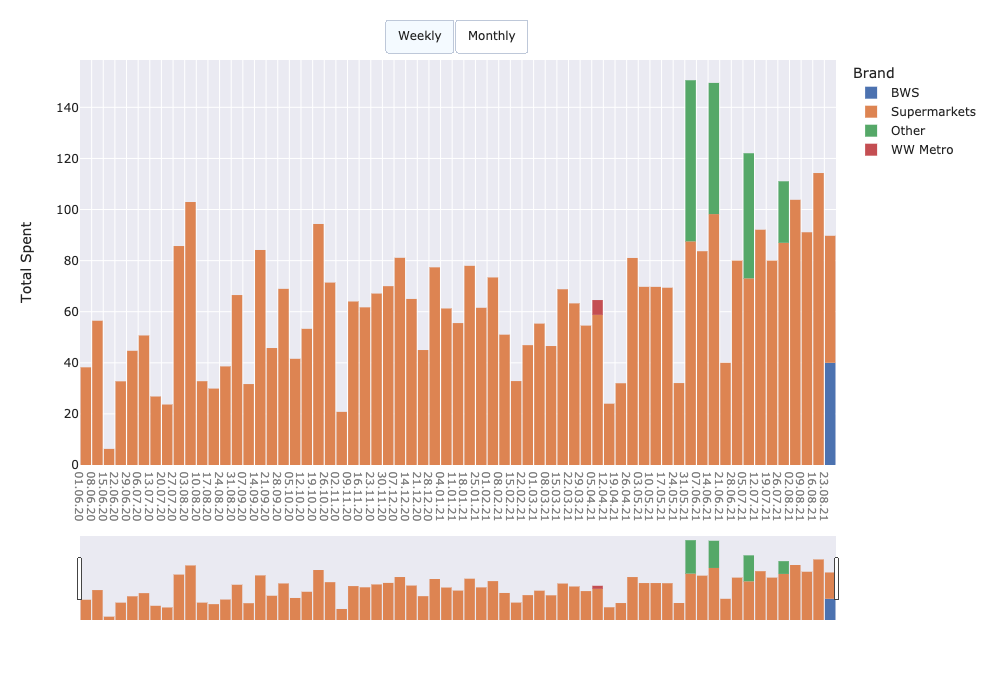

In [27]:
data_content['Plot Timeline'].show()

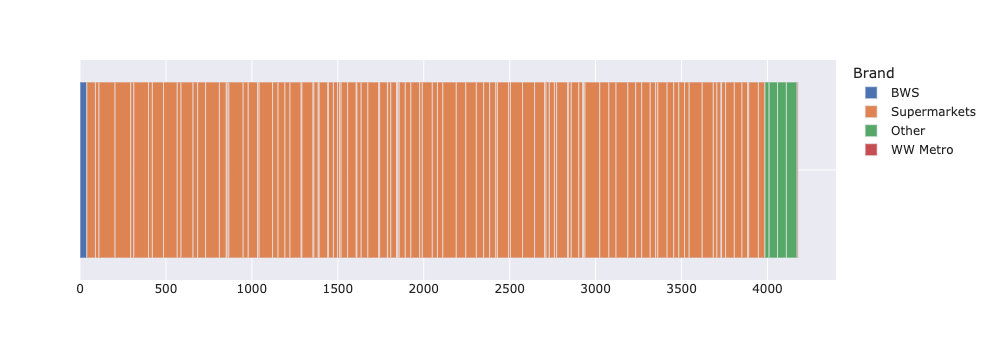

In [28]:
data_content['Plot Brands'].show()

In [29]:
# products Most oftern bought
data_content['Favorite Products Count']

,Product,Ea
0,WW Scotch Finger 250g,71.0
1,WW Drought Relief Whole Milk 2L,36.0
2,WW Evaporated Milk 385ml,26.0
3,WW Sweetened Condensed Milk 397g,25.0
4,WW Sour Cream 300ml,22.0
5,WW Roast Chicken,22.0
6,Woolworths Reusable Bag,21.0
7,Woolworths Turkish Rolls 4pk 400g,20.0
8,Berry Strawberry 250g P/P,19.0


In [ ]:
# Products most spent on
data_content['Favorite Products Spent']

In [ ]:
# favourite stores
data_content['Favourite Stores']